In [1]:
import pandas as pd
import matplotlib.pyplot as plt

yolov8_results = pd.read_csv('../detect/fraconly_yolov8m_50/results.csv')
eca_results = pd.read_csv('../detect/fraconly_yolov8m_ECA_50/results.csv')
a2_results = pd.read_csv('../detect/fraconly_yolov8m_A2_50/results.csv')
gam_results = pd.read_csv('../detect/fraconly_yolov8m_GAM_50/results.csv')
mlca_results = pd.read_csv('../detect/fraconly_yolov8m_MLCA_50/results.csv')
sa_results = pd.read_csv('../detect/fraconly_yolov8m_SA_50/results.csv')
cbam_results = pd.read_csv('../detect/fraconly_yolov8m_ResBlock_CBAM_50/results.csv')

In [2]:
last_row_values = {
    "YOLOv8_ECA": eca_results.iloc[-1, 1:-3],
    "YOLOv8_GAM": gam_results.iloc[-1, 1:-3],
    "ResBlock_CBAM": cbam_results.iloc[-1, 1:-3],
    "YOLOv8_SA": sa_results.iloc[-1, 1:-3],
    "YOLOv8": yolov8_results.iloc[-1, 1:-3],
    "YOLOv8_A2": a2_results.iloc[-1, 1:-3],
    "YOLOv8_MLCA": mlca_results.iloc[-1, 1:-3]
}

In [3]:
last_epoch_data = pd.DataFrame({
    metric: [df[metric] for df in last_row_values.values()]
    for metric in last_row_values["YOLOv8_ECA"].index
}, index=last_row_values.keys())

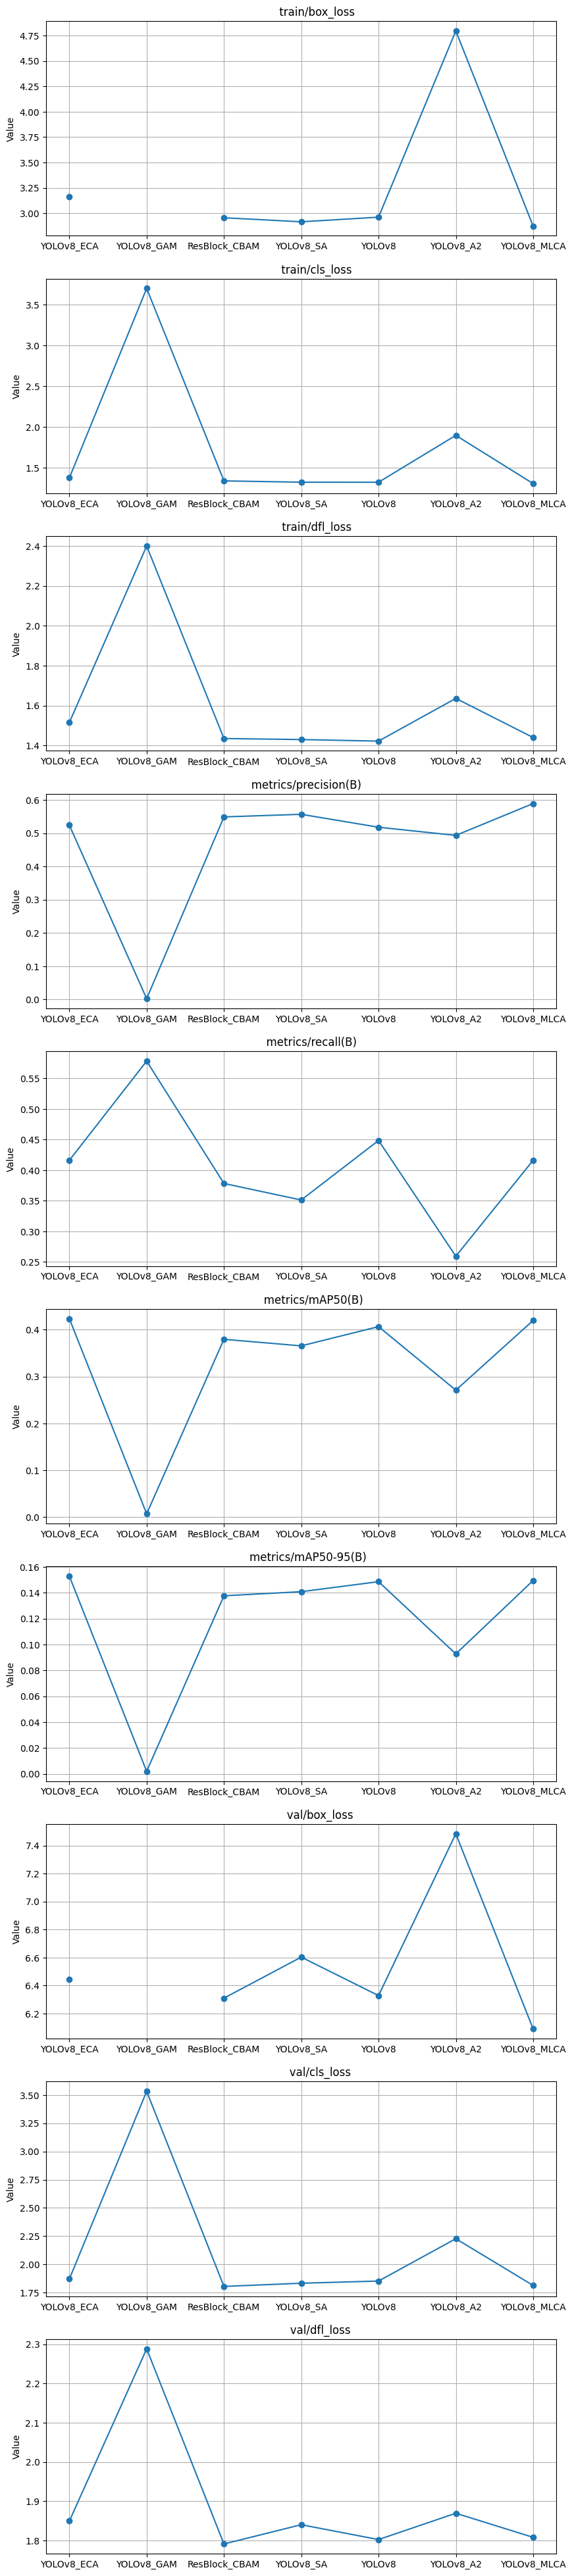

<Figure size 1000x600 with 0 Axes>

In [4]:
# Creating individual line plots for each metric for clearer comparison
num_metrics = len(last_epoch_data.columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5*num_metrics))

for i, metric in enumerate(last_epoch_data.columns):
    axes[i].plot(last_epoch_data.index, last_epoch_data[metric], marker='o', linestyle='-')
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.figure(figsize=(10,6))
plt.tight_layout()
fig.savefig('analyze-fracatlas.png')
plt.show()